# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 100
page_size = 100
reviews = []
recommendations = []
for i in range(1, pages + 1):
    print(f"Scraping page {i}")
    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    # Collect HTML data from this page
    response = requests.get(url)
    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    # Find all review div elements and append their text content to the 'reviews' list
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    # Find all recommendation elements and append their text content to the 'recommendations' list
    recommendation_tags = parsed_content.find_all(string=["no", "yes"])
    for rec in recommendation_tags:
        recommendations.append(rec)
    print(f"   ---> {len(reviews)} total reviews")
    print(f"   ---> {len(recommendations)} total recommendations")
# Print the number of reviews and recommendations scraped in total
print(f"Total reviews scraped: {len(reviews)}")
print(f"Total recommendations scraped: {len(recommendations)}")


Scraping page 1
   ---> 100 total reviews
   ---> 100 total recommendations
Scraping page 2
   ---> 200 total reviews
   ---> 200 total recommendations
Scraping page 3
   ---> 300 total reviews
   ---> 300 total recommendations
Scraping page 4
   ---> 400 total reviews
   ---> 400 total recommendations
Scraping page 5
   ---> 500 total reviews
   ---> 500 total recommendations
Scraping page 6
   ---> 600 total reviews
   ---> 600 total recommendations
Scraping page 7
   ---> 700 total reviews
   ---> 700 total recommendations
Scraping page 8
   ---> 800 total reviews
   ---> 800 total recommendations
Scraping page 9
   ---> 900 total reviews
   ---> 900 total recommendations
Scraping page 10
   ---> 1000 total reviews
   ---> 1000 total recommendations
Scraping page 11
   ---> 1100 total reviews
   ---> 1100 total recommendations
Scraping page 12
   ---> 1200 total reviews
   ---> 1200 total recommendations
Scraping page 13
   ---> 1300 total reviews
   ---> 1300 total recommendations


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df["recommendations"] = recommendations
df

,reviews,recommendations
0,Not Verified | I flew from Malaga via LHR to...,no
1,✅ Trip Verified | Milan to Miami return via L...,no
2,✅ Trip Verified | BA created a new low-cost s...,no
3,✅ Trip Verified | I flew with British Airway...,no
4,✅ Trip Verified | Manchester to Copenhagen vi...,yes
...,...,...
3790,Flew LHR - VIE return operated by bmi but BA a...,yes
3791,LHR to HAM. Purser addresses all club passenge...,yes
3792,My son who had worked for British Airways urge...,yes
3793,London City-New York JFK via Shannon on A318 b...,no


In [4]:
df['recommendations'].value_counts()
#print(df.columns)


recommendations
no     2267
yes    1528
Name: count, dtype: int64

Congratulations! Now you have your dataset for this task! The loops above collected 3000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
import os

# Create the "data" directory if it doesn't exist
directory = "data"
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file in the "data" directory
file_path = os.path.join(directory, "BA_reviews.csv")
df.to_csv(file_path, index=False)  # Set index=False to exclude row numbers in the CSV

# Confirm that the file has been saved successfully
print(f"File saved to: {file_path}")


File saved to: data/BA_reviews.csv


In [6]:
#importing the necessary libraries
import re
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [7]:
df.reviews.value_counts()


reviews
Muscat - Abu Dhabi - London. Delayed over two hours no vouchers offered. No welcome drinks or papers offered on the ground both sectors. Not all screens opened for the front row to watch the safety video. No cabin checks done on one side ex Abu Dhabi. Menus left on the seat arms in the middle of the night. Crew did not seem to have any supervision or experience.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [8]:
df['reviews'] [0]

'Not Verified |   I flew from Malaga via LHR to Boston on the 4th May 2024 and on arrival in Boston discovered my luggage was still in London. Filed a report and now 4 days later no sign of the luggage. The baggage customer service is a joke. Not interested in the clients or giving a good service. Updates are useless. I know my luggage has been sitting in Boston since the 5th as I have an air tag inside it. The airline seem to have no intention of getting my luggage to me. The robots on FB messenger & twitter are useless. I opened a complaint & when I checked the update of my complaint the case had been closed despite never been contacted by a human!! This airline is now a joke and if I ever get my luggage back I doubt I will ever fly with them again. They are now worse than Air Canada in my book and that is saying something.'

In [9]:
df['reviews'].value_counts()


reviews
Muscat - Abu Dhabi - London. Delayed over two hours no vouchers offered. No welcome drinks or papers offered on the ground both sectors. Not all screens opened for the front row to watch the safety video. No cabin checks done on one side ex Abu Dhabi. Menus left on the seat arms in the middle of the night. Crew did not seem to have any supervision or experience.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [10]:
df.reviews= df.reviews.str.split('|',expand=True)[1]
df.head()


,reviews,recommendations
0,I flew from Malaga via LHR to Boston on the...,no
1,Milan to Miami return via London. Worst busi...,no
2,BA created a new low-cost subsidiary in BA E...,no
3,I flew with British Airways from Heathrow t...,no
4,Manchester to Copenhagen via London on 30th ...,yes


In [11]:
# Function to check for missing values
def check_missing_values(data):
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found:")
        print(missing_values)
    else:
        print("No missing values found.")
# Check for missing values
check_missing_values(df)

Missing values found:
reviews            1523
recommendations       0
dtype: int64


In [12]:
# Drop row with missing value
df.dropna(axis=0, inplace=True)
# Confirm missing rows dropped
check_missing_values(df)

No missing values found.


In [13]:
def preprocess_text(df):

    # Convert text to lowercase
    df['reviews'] = df['reviews'].str.lower()
    # Remove punctuations
    df['reviews'] = df['reviews'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
    # Tokenize the 'reviews' column
    df['reviews'] = df['reviews'].apply(word_tokenize)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    df['reviews'] = df['reviews'].apply(lambda x: [word for word in x if word not in stop_words])
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    df['reviews'] = df['reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    return df
preprocessed_df = preprocess_text(df)
preprocessed_df

,reviews,recommendations
0,"[flew, malaga, via, lhr, boston, 4th, may, 202...",no
1,"[milan, miami, return, via, london, worst, bus...",no
2,"[ba, created, new, lowcost, subsidiary, ba, eu...",no
3,"[flew, british, airway, heathrow, hannover, al...",no
4,"[manchester, copenhagen, via, london, 30th, ap...",yes
...,...,...
2440,"[london, heathrow, houston, british, airway, f...",yes
2441,"[flown, british, airway, 100, time, usually, b...",no
2442,"[british, airway, seattle, johannesburg, via, ...",yes
2444,"[gatwick, amsterdam, business, class, truly, u...",no


In [14]:
preprocessed_df['recommendations'] = preprocessed_df['recommendations'].apply(lambda x: 1 if x=='yes' else 0)
preprocessed_df

,reviews,recommendations
0,"[flew, malaga, via, lhr, boston, 4th, may, 202...",0
1,"[milan, miami, return, via, london, worst, bus...",0
2,"[ba, created, new, lowcost, subsidiary, ba, eu...",0
3,"[flew, british, airway, heathrow, hannover, al...",0
4,"[manchester, copenhagen, via, london, 30th, ap...",1
...,...,...
2440,"[london, heathrow, houston, british, airway, f...",1
2441,"[flown, british, airway, 100, time, usually, b...",0
2442,"[british, airway, seattle, johannesburg, via, ...",1
2444,"[gatwick, amsterdam, business, class, truly, u...",0


In [15]:
#modelling
text = df['reviews']
label = df['recommendations']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text,label,test_size=0.15)


In [17]:
# Create a bag-of-words representation of the text data
vectorizer = CountVectorizer(analyzer=lambda x: x)
X_train_bow = vectorizer.fit_transform(X_train).toarray()
X_test_bow = vectorizer.transform(X_test).toarray()
# Train a Logistic Regression classifier for sentiment analysis
clf = LogisticRegression(random_state=42)
clf.fit(X_train_bow, y_train)
# Make predictions on the test set
predictions = clf.predict(X_test_bow)
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8621700879765396
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       223
           1       0.81      0.79      0.80       118

    accuracy                           0.86       341
   macro avg       0.85      0.84      0.85       341
weighted avg       0.86      0.86      0.86       341



In [18]:
# Train a Decision Tree classifier for sentiment analysis
dec_clf = DecisionTreeClassifier(random_state=42)
dec_clf.fit(X_train_bow, y_train)
# Make predictions on the test set
predictions = dec_clf.predict(X_test_bow)
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.7947214076246334
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       223
           1       0.72      0.66      0.69       118

    accuracy                           0.79       341
   macro avg       0.78      0.76      0.77       341
weighted avg       0.79      0.79      0.79       341



In [19]:
# Train a Random Forest classifier for sentiment analysis
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_bow, y_train)
# Make predictions on the test set
predictions = rf_clf.predict(X_test_bow)
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8592375366568915
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       223
           1       0.92      0.65      0.76       118

    accuracy                           0.86       341
   macro avg       0.88      0.81      0.83       341
weighted avg       0.87      0.86      0.85       341



In [20]:
from sklearn.model_selection import GridSearchCV


In [21]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 150],      # Number of trees in the forest
    'max_depth': [None, 10, 20],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
}
# Perform grid search using 3-fold cross-validation
grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_bow, y_train)
# Get the best model from grid search
best_rf_clf = grid_search.best_estimator_
# Make predictions on the test set using the best model
predictions = best_rf_clf.predict(X_test_bow)
# Evaluate the best model's performance
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.8592375366568915
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       223
           1       0.91      0.66      0.76       118

    accuracy                           0.86       341
   macro avg       0.88      0.81      0.83       341
weighted avg       0.87      0.86      0.85       341



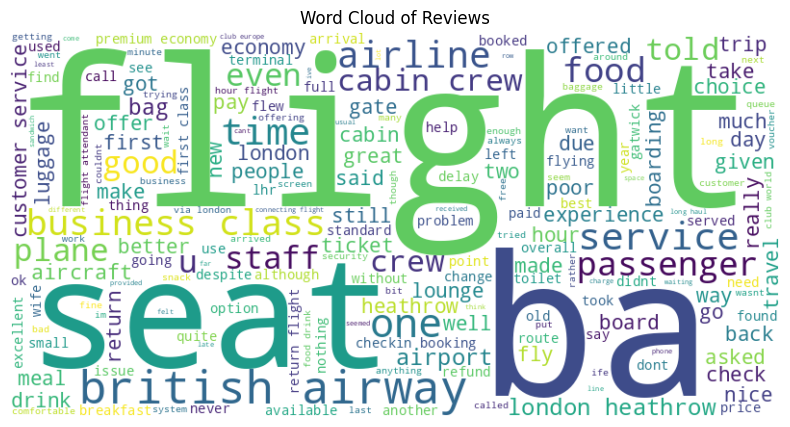

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Combine all the preprocessed reviews into a single text string
all_reviews_text = ' '.join([' '.join(review) for review in preprocessed_df['reviews']])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

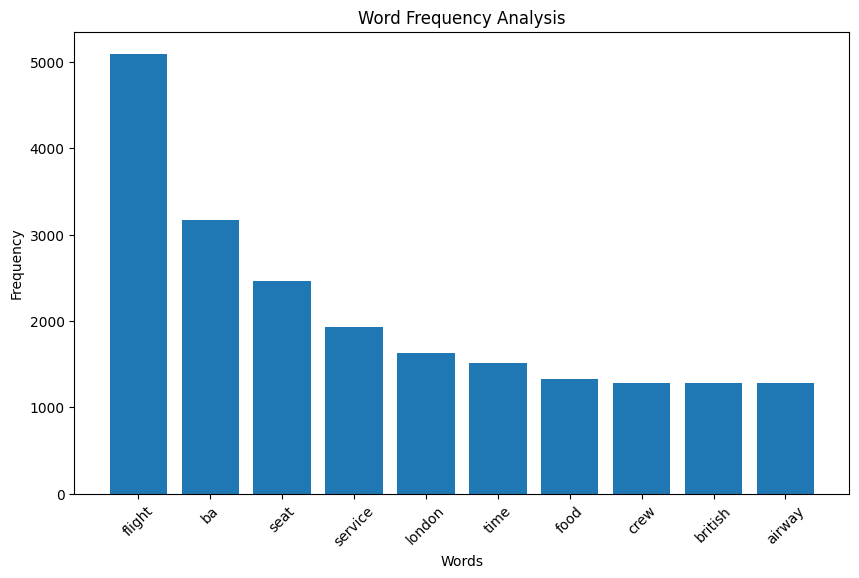

In [23]:
from nltk.probability import FreqDist

# Combine all the preprocessed reviews into a single list of words
all_reviews_words = [word for review in preprocessed_df['reviews'] for word in review]
# Calculate word frequencies
word_freq = FreqDist(all_reviews_words)
# Get the most common words and their frequencies
most_common_words = word_freq.most_common(10)
# Convert to a DataFrame for plotting
word_freq_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
# Plot the word frequency analysis
plt.figure(figsize=(10, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Analysis')
plt.xticks(rotation=45)
plt.show()

<h1><b><u>Topic Modelling</u></b></h1>

In [24]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

Topic 0: 0.019*"flight" + 0.018*"seat" + 0.015*"ba" + 0.011*"service" + 0.011*"class" + 0.010*"airway" + 0.010*"british" + 0.009*"airline" + 0.009*"business" + 0.008*"economy"
Topic 1: 0.024*"flight" + 0.014*"seat" + 0.012*"ba" + 0.011*"crew" + 0.011*"good" + 0.010*"food" + 0.010*"time" + 0.010*"cabin" + 0.009*"service" + 0.008*"london"
Topic 2: 0.030*"flight" + 0.018*"ba" + 0.009*"hour" + 0.008*"british" + 0.008*"airway" + 0.007*"time" + 0.007*"would" + 0.007*"london" + 0.007*"u" + 0.007*"told"
Coherence Score: 0.3405000526365147


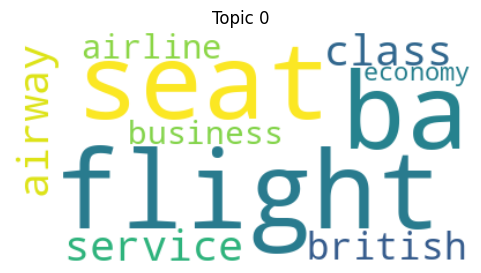

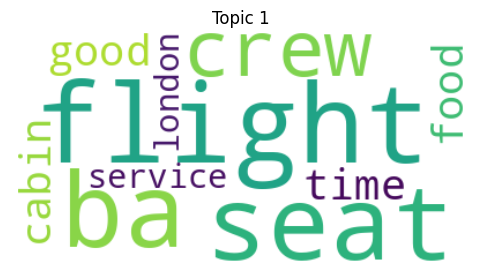

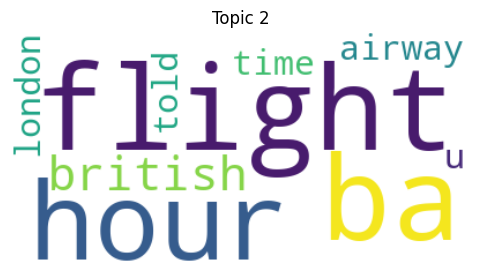

In [25]:
# Create a dictionary and corpus (bag-of-words representation) for LDA
dictionary = corpora.Dictionary(preprocessed_df['reviews'])
corpus = [dictionary.doc2bow(review) for review in preprocessed_df['reviews']]
# Build LDA model
num_topics = 3  # You can change the number of topics as per your requirement
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)
# Get topics and their top keywords
topics = lda_model.print_topics(num_topics=num_topics)
# Display topics and top keywords
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")
# Compute coherence score for the model (optional)
coherence_model = CoherenceModel(model=lda_model, texts=preprocessed_df['reviews'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score: {coherence_score}")
# Visualize topics using word clouds (optional)
for topic in topics:
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(topic[1])
    plt.figure(figsize=(6, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Topic {topic[0]}")
    plt.show()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Sentiment Distribution:
sentiment
Positive    0.665876
Negative    0.316996
Neutral     0.017128
Name: proportion, dtype: float64


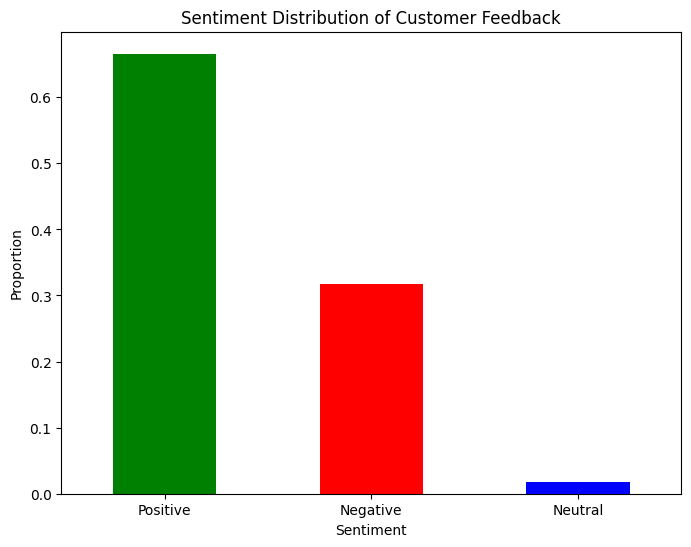

In [26]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load customer feedback data from a CSV file
file_path = "data/BA_reviews.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphanumeric characters, and lemmatize tokens
    clean_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return " ".join(clean_tokens)

# Apply preprocessing to the 'reviews' column
df['clean_reviews'] = df['reviews'].apply(preprocess_text)

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the preprocessed reviews
df['sentiment'] = df['clean_reviews'].apply(analyze_sentiment)

# Display the sentiment distribution
sentiment_distribution = df['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_distribution)

# Visualize the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution of Customer Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()


In [27]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

# Load customer feedback data from a CSV file
file_path = "data/BA_reviews.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphanumeric characters, and lemmatize tokens
    clean_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return " ".join(clean_tokens)

# Apply preprocessing to the 'reviews' column
df['clean_reviews'] = df['reviews'].apply(preprocess_text)

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each review
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the preprocessed reviews
df['sentiment'] = df['clean_reviews'].apply(analyze_sentiment)

# Detailed sentiment analysis
def detailed_sentiment_analysis(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive', scores['pos']
    elif scores['compound'] <= -0.05:
        return 'Negative', scores['neg']
    else:
        return 'Neutral', scores['neu']

# Apply detailed sentiment analysis to the preprocessed reviews
df['detailed_sentiment'], df['sentiment_score'] = zip(*df['clean_reviews'].apply(detailed_sentiment_analysis))

# Highlight areas of improvement and aspects working well
improvement_areas = df[df['detailed_sentiment'] == 'Negative']['reviews'].head(5)
aspects_working_well = df[df['detailed_sentiment'] == 'Positive']['reviews'].head(5)

# Display improvement areas and aspects working well
print("Areas of Improvement:")
print(improvement_areas)
print("\nAspects Working Well:")
print(aspects_working_well)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Areas of Improvement:
0    Not Verified |   I flew from Malaga via LHR to...
1    ✅ Trip Verified |  Milan to Miami return via L...
3    ✅ Trip Verified |   I flew with British Airway...
5    ✅ Trip Verified |  I have never seen such disr...
6    ✅ Trip Verified |  Paid for a 14 hour long fli...
Name: reviews, dtype: object

Aspects Working Well:
2     ✅ Trip Verified |  BA created a new low-cost s...
4     ✅ Trip Verified |  Manchester to Copenhagen vi...
9     ✅ Trip Verified |  We booked premium economy r...
10    ✅ Trip Verified |  We chose Rotterdam and Lond...
13    Not Verified | I wanted to write this review s...
Name: reviews, dtype: object


In [28]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pandas as pd

# Download necessary NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load customer feedback data from a CSV file
file_path = "data/BA_reviews.csv"  # Update with the actual file path
df = pd.read_csv(file_path)

# Preprocess text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords and non-alphanumeric characters, and lemmatize tokens
    clean_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return clean_tokens

# Apply preprocessing to the 'reviews' column
df['clean_reviews'] = df['reviews'].apply(preprocess_text)

# Flatten the list of clean tokens
all_tokens = [token for review_tokens in df['clean_reviews'] for token in review_tokens]

# Identify the most common challenges faced by customers
challenges_counter = Counter(all_tokens)  # Count occurrences of each token
most_common_challenges = challenges_counter.most_common(10)  # Get the 10 most common tokens

print("Most common challenges faced by customers:")
for token, count in most_common_challenges:
    print(f"{token}: {count}")

# Identify the best services offered according to customer feedback
positive_reviews = df[df['reviews'] == 'Positive']['clean_reviews']
positive_tokens = [token for review_tokens in positive_reviews for token in review_tokens]

best_services_counter = Counter(positive_tokens)  # Count occurrences of tokens in positive reviews
most_common_services = best_services_counter.most_common(10)  # Get the 10 most common tokens

print("\nBest services offered according to customer feedback:")
for token, count in most_common_services:
    print(f"{token}: {count}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Most common challenges faced by customers:
flight: 8032
ba: 4963
seat: 4564
service: 3037
time: 2481
food: 2395
crew: 2275
verified: 2257
london: 2213
british: 2208

Best services offered according to customer feedback:


Based on the most common tokens identified as challenges faced by customers, we can infer some of the common challenges:

1. **Flight**: This could indicate issues related to the flight experience, such as delays, cancellations, or discomfort during the flight.
  
2. **BA** (British Airways): Customers may be facing specific issues or challenges related to British Airways as an airline, such as customer service, flight scheduling, or overall experience with the airline.

3. **Seat**: Challenges related to seating arrangements, comfort, availability, or preferences for seating options.

4. **Service**: General dissatisfaction or issues with the service provided by British Airways, including customer service interactions, onboard service, or assistance during the flight.

5. **Time**: This could refer to issues related to punctuality, on-time performance of flights, or time-related inconveniences experienced by customers.

6. **Food**: Challenges related to onboard catering, meal options, quality, or availability of food and beverages during the flight.

7. **Crew**: Issues or challenges with the behavior, professionalism, or assistance provided by the flight crew or staff members.

8. **Verified**: This may indicate that customers are specifically mentioning "verified" experiences, possibly indicating a desire for transparency or authenticity in reviews.

9. **British**: Similar to "BA", this could refer to challenges specifically related to British Airways as an airline, its operations, or its services.

10. **London**: Challenges or issues related to flights to or from London, possibly indicating experiences specific to routes involving London airports.

While these interpretations are based on the most common tokens identified in the reviews, further analysis and context-specific understanding may be required to fully understand the nature and specifics of these challenges faced by customers of British Airways.

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment scores for a given text
def get_sentiment_scores(text):
    return sid.polarity_scores(text)

# Calculate sentiment scores for each review and each common challenge
df['sentiment_scores'] = df['reviews'].apply(get_sentiment_scores)

# Function to get the dominant sentiment label from the sentiment scores
def get_sentiment_label(scores):
    compound_score = scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Get the dominant sentiment label for each review
df['sentiment_label'] = df['sentiment_scores'].apply(get_sentiment_label)

# Calculate the distribution of sentiment labels for each common challenge
sentiment_distribution = df.groupby('sentiment_label').size() / len(df)
print("Sentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
sentiment_label
Negative    0.408696
Neutral     0.013175
Positive    0.578129
dtype: float64


In [30]:
# Function to conduct aspect-based sentiment analysis for each common challenge
def aspect_based_sentiment_analysis(challenge):
    # Filter reviews mentioning the given challenge
    challenge_reviews = df[df['reviews'].str.contains(challenge, case=False)]

    # Extract aspects related to the challenge
    aspects = []
    if challenge == 'flight':
        aspects = ['punctuality', 'schedule', 'comfort', 'cancellations', 'delays']
    elif challenge == 'ba':
        aspects = ['customer service', 'booking process', 'loyalty program', 'website usability']
    # Add more aspects for other challenges as needed

    # Analyze sentiment for each aspect
    aspect_sentiment = {}
    for aspect in aspects:
        aspect_reviews = challenge_reviews[challenge_reviews['reviews'].str.contains(aspect, case=False)]
        if len(aspect_reviews) > 0:
            aspect_sentiment[aspect] = aspect_reviews['sentiment_label'].value_counts(normalize=True)

    return aspect_sentiment

# Perform aspect-based sentiment analysis for each common challenge
common_challenges = ['flight', 'ba', 'seat', 'service', 'time', 'food', 'crew', 'verified', 'british', 'london']
for challenge in common_challenges:
    print(f"\nAspect-Based Sentiment Analysis for '{challenge}':")
    aspect_sentiment = aspect_based_sentiment_analysis(challenge)
    if aspect_sentiment:
        for aspect, sentiment_distribution in aspect_sentiment.items():
            print(f"Aspect: {aspect}")
            print("Sentiment Distribution:")
            print(sentiment_distribution)
    else:
        print("No specific aspects found for this challenge.")



Aspect-Based Sentiment Analysis for 'flight':
Aspect: punctuality
Sentiment Distribution:
sentiment_label
Negative    0.692308
Positive    0.307692
Name: proportion, dtype: float64
Aspect: schedule
Sentiment Distribution:
sentiment_label
Positive    0.548718
Negative    0.441026
Neutral     0.010256
Name: proportion, dtype: float64
Aspect: comfort
Sentiment Distribution:
sentiment_label
Positive    0.729352
Negative    0.264295
Neutral     0.006353
Name: proportion, dtype: float64
Aspect: cancellations
Sentiment Distribution:
sentiment_label
Negative    0.5
Positive    0.5
Name: proportion, dtype: float64
Aspect: delays
Sentiment Distribution:
sentiment_label
Negative    0.569892
Positive    0.419355
Neutral     0.010753
Name: proportion, dtype: float64

Aspect-Based Sentiment Analysis for 'ba':
Aspect: customer service
Sentiment Distribution:
sentiment_label
Negative    0.678019
Positive    0.294118
Neutral     0.027864
Name: proportion, dtype: float64
Aspect: booking process
Sentime